In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme()

In [2]:
# Get a list of all files which are .csv files in ../DOTSSimulator/Assets/SimulationResults
import os
files = [f for f in os.listdir('.') if f.endswith('.csv')]
# Sort the files descending
files.sort()

print(f'Found {len(files)} files')
print(f'Newest file: {files[0]}')
print(files)


Found 3 files
Newest file: 3-1-feeding-range-1.csv
['3-1-feeding-range-1.csv', '3-2-feeding-range-10.csv', '3-3-up-feeding-rate.csv']


In [3]:
results_df: pd.DataFrame = pd.read_csv(files[0])
# Print basic information about the dataframe
print(results_df.info())

results_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Step                1064 non-null   int64  
 1   TimeStamp           1064 non-null   float64
 2   AvgEnergy           1064 non-null   float64
 3   AverageEnergy_5th   1064 non-null   float64
 4   AverageEnergy_95th  1064 non-null   float64
 5   NoBoids             1064 non-null   int64  
 6   NoFoodSources       1064 non-null   int64  
 7   TotalFoodAvailable  1064 non-null   float64
 8   Polarization        1064 non-null   float64
 9   Expanse             1064 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 83.2 KB
None


,Step,TimeStamp,AvgEnergy,AverageEnergy_5th,AverageEnergy_95th,NoBoids,NoFoodSources,TotalFoodAvailable,Polarization,Expanse
0,0,0.00100,384.0000,384.0000,384.0000,25,1,450.0000,0.492735,4.853849
1,1,59.87059,384.0692,384.0679,384.0706,25,1,450.4144,0.494468,0.546763
2,2,119.87070,384.1380,384.1364,384.1403,25,1,450.8371,0.421971,0.852761
3,3,179.87070,384.2071,384.2043,384.2099,25,1,451.2543,0.480478,0.366447
4,4,239.87020,384.2755,384.2717,384.2798,25,1,451.6880,0.447235,0.596588


In [4]:
# Configuration:

truncated_df_1 = results_df.iloc[1:721]

print(truncated_df_1.describe())

truncated_df_1['AvgEnergy_ymin'] = truncated_df_1['AverageEnergy_5th']
truncated_df_1['AvgEnergy_ymax'] = truncated_df_1['AverageEnergy_95th']

truncated_df_1['TotalFoodAvailable_ymin'] = truncated_df_1['TotalFoodAvailable']
truncated_df_1['TotalFoodAvailable_ymax'] = truncated_df_1['TotalFoodAvailable']

truncated_df_1.info()
truncated_df_1.head()

             Step     TimeStamp   AvgEnergy  AverageEnergy_5th  \
count  720.000000    720.000000  720.000000         720.000000   
mean   360.500000  21630.864072  408.930160         408.908140   
std    207.990384  12480.242626   14.385177          14.377991   
min      1.000000     59.870590  384.069200         384.067900   
25%    180.750000  10845.010000  396.496675         396.481600   
50%    360.500000  21630.470000  408.929300         408.899050   
75%    540.250000  32417.000000  421.364375         421.336450   
max    720.000000  43202.000000  433.794800         433.759800   

       AverageEnergy_95th  NoBoids  NoFoodSources  TotalFoodAvailable  \
count          720.000000    720.0          720.0          720.000000   
mean           408.960543     25.0            1.0          599.693042   
std             14.397290      0.0            0.0           86.322181   
min            384.070600     25.0            1.0          450.414400   
25%            396.517725     25.0      

C:\Users\Niels\AppData\Local\Temp\ipykernel_15980\3017156009.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  truncated_df_1['AvgEnergy_ymin'] = truncated_df_1['AverageEnergy_5th']
C:\Users\Niels\AppData\Local\Temp\ipykernel_15980\3017156009.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  truncated_df_1['AvgEnergy_ymax'] = truncated_df_1['AverageEnergy_95th']
C:\Users\Niels\AppData\Local\Temp\ipykernel_15980\3017156009.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,Step,TimeStamp,AvgEnergy,AverageEnergy_5th,AverageEnergy_95th,NoBoids,NoFoodSources,TotalFoodAvailable,Polarization,Expanse,AvgEnergy_ymin,AvgEnergy_ymax,TotalFoodAvailable_ymin,TotalFoodAvailable_ymax
1,1,59.87059,384.0692,384.0679,384.0706,25,1,450.4144,0.494468,0.546763,384.0679,384.0706,450.4144,450.4144
2,2,119.87070,384.1380,384.1364,384.1403,25,1,450.8371,0.421971,0.852761,384.1364,384.1403,450.8371,450.8371
3,3,179.87070,384.2071,384.2043,384.2099,25,1,451.2543,0.480478,0.366447,384.2043,384.2099,451.2543,451.2543
4,4,239.87020,384.2755,384.2717,384.2798,25,1,451.6880,0.447235,0.596588,384.2717,384.2798,451.6880,451.6880
5,5,299.87020,384.3449,384.3408,384.3489,25,1,452.0979,0.492135,0.962164,384.3408,384.3489,452.0979,452.0979


In [20]:
metrics = ['AvgEnergy', 'TotalFoodAvailable']

melted = pd.melt(truncated_df_1, id_vars=['Step'], value_vars=metrics, var_name='Metric', value_name='Energy / Food available (g)')
melted.rename(columns={'Step': 'Time (hours)'}, inplace=True)
ymin = []
ymax = []
for name in metrics:
    ymin.extend(truncated_df_1[f"{name}_ymin"].to_numpy())
    ymax.extend(truncated_df_1[f"{name}_ymax"].to_numpy())
    pass

melted['ymin'] = ymin
melted['ymax'] = ymax

melted.head()

,Time (hours),Metric,Energy / Food available (g),ymin,ymax
0,1,AvgEnergy,384.0692,384.0679,384.0706
1,2,AvgEnergy,384.1380,384.1364,384.1403
2,3,AvgEnergy,384.2071,384.2043,384.2099
3,4,AvgEnergy,384.2755,384.2717,384.2798
4,5,AvgEnergy,384.3449,384.3408,384.3489


In [6]:
melted.tail()

,Step,Metric,Value,ymin,ymax
1435,716,TotalFoodAvailable,747.2306,747.2306,747.2306
1436,717,TotalFoodAvailable,747.6433,747.6433,747.6433
1437,718,TotalFoodAvailable,748.0486,748.0486,748.0486
1438,719,TotalFoodAvailable,748.4701,748.4701,748.4701
1439,720,TotalFoodAvailable,748.8796,748.8796,748.8796


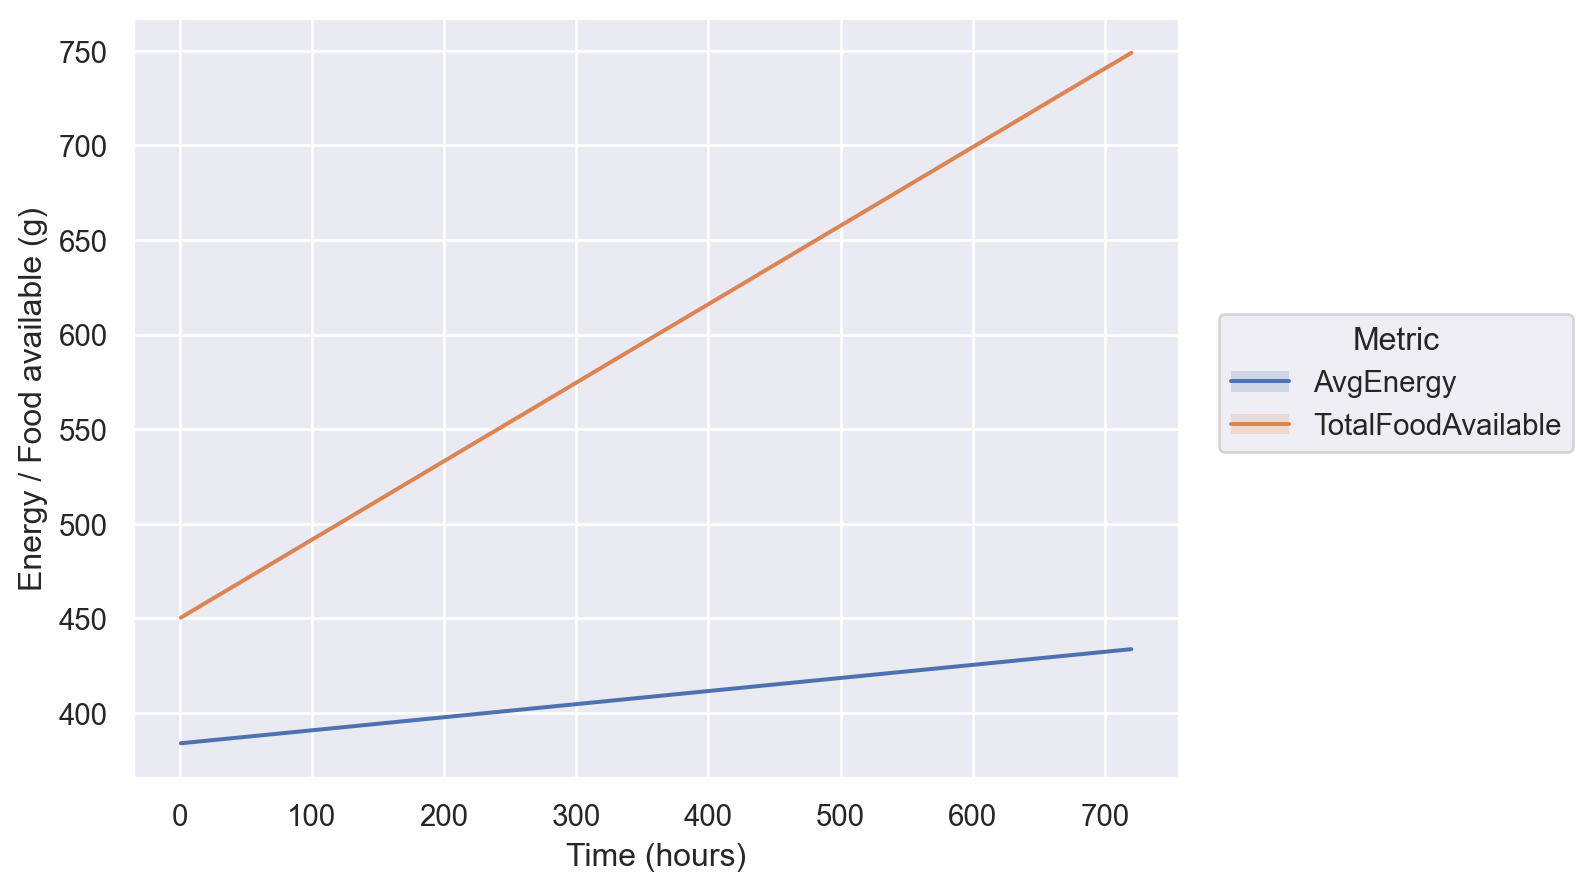

<Figure size 1500x500 with 0 Axes>

In [27]:
fig = plt.figure(figsize=(15, 5))


import seaborn.objects as so

p = (
    so.Plot(data=melted, x='Time (hours)', y='Energy / Food available (g)', color='Metric', ymin='ymin', ymax='ymax')
        .add(so.Line())
        .add(so.Band())
)
p.save('plots/exp3-Environment-1.pdf')
# p.show()
# plt.xlabel('Time (hours)')
# plt.ylabel('Energy / Food available (g)')
# plt.tight_layout()
# plt.legend()
 
# plt.savefig('plots/exp3-Environment-1.pdf')

In [28]:
# Compute coefficient in avg energy
min_food = truncated_df_1['TotalFoodAvailable'].min()
max_food = truncated_df_1['TotalFoodAvailable'].max()
print(f'Min food available: {min_food}')
print(f'Max food available: {max_food}')
print(f'Coefficient: {(max_food - min_food) / 30}')

# Compute coefficient in avg energy
min_energy = truncated_df_1['AvgEnergy'].min()
max_energy = truncated_df_1['AvgEnergy'].max()
print(f'Min energy: {min_energy}')
print(f'Max energy: {max_energy}')
coeff = (max_energy - min_energy) / 30
print(f'Coefficient: {(max_energy - min_energy) / 30}')

Min food available: 450.4144
Max food available: 748.8796
Coefficient: 9.948839999999999
Min energy: 384.0692
Max energy: 433.7948
Coefficient: 1.6575199999999994


In [29]:
results_df: pd.DataFrame = pd.read_csv(files[1])
truncated_df_2 = results_df.iloc[1:721]

print(truncated_df_2.describe())
truncated_df_2.info()
truncated_df_2.head()

             Step     TimeStamp   AvgEnergy  NoBoids  NoFoodSources  \
count  720.000000    720.000000  720.000000    720.0          720.0   
mean   360.500000  21630.917911  414.917694     25.0            1.0   
std    207.990384  12480.260841   17.838064      0.0            0.0   
min      1.000000     59.871060  384.085600     25.0            1.0   
25%    180.750000  10845.010000  399.501650     25.0            1.0   
50%    360.500000  21630.560000  414.917700     25.0            1.0   
75%    540.250000  32417.040000  430.333750     25.0            1.0   
max    720.000000  43202.040000  445.749800     25.0            1.0   

       TotalFoodAvailable  Polarization     Expanse  
count        7.200000e+02    720.000000  720.000000  
mean         4.500047e+02      0.465448    0.777647  
std          1.137659e-13      0.025510    0.169015  
min          4.500047e+02      0.321257    0.331554  
25%          4.500047e+02      0.453017    0.661942  
50%          4.500047e+02      0.471

,Step,TimeStamp,AvgEnergy,NoBoids,NoFoodSources,TotalFoodAvailable,Polarization,Expanse
1,1,59.87106,384.0856,25,1,450.0047,0.469230,0.709151
2,2,119.87110,384.1713,25,1,450.0047,0.454103,0.590944
3,3,179.87110,384.2571,25,1,450.0047,0.446927,0.785945
4,4,239.87110,384.3429,25,1,450.0047,0.445897,0.894300
5,5,299.87110,384.4286,25,1,450.0047,0.488847,0.713243


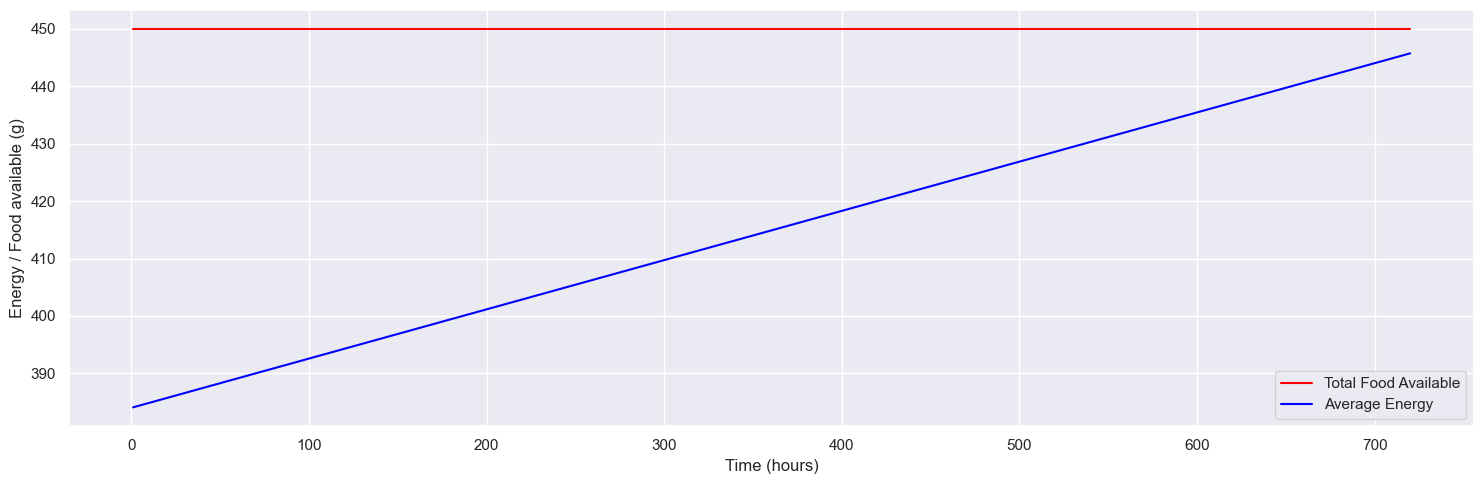

In [30]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot()
sns.lineplot(data=truncated_df_2, x='Step', y='TotalFoodAvailable', color='red', ax=ax, label='Total Food Available')
sns.lineplot(data=truncated_df_2, x='Step', y='AvgEnergy', color='blue', ax=ax, label='Average Energy')
plt.xlabel('Time (hours)')
plt.ylabel('Energy / Food available (g)')
plt.tight_layout()
plt.legend()
 
plt.savefig('plots/exp3-Environment-2.pdf')

In [32]:
# Compute coefficient in avg energy
min_food_2 = truncated_df_2['TotalFoodAvailable'].min()
max_food_2 = truncated_df_2['TotalFoodAvailable'].max()
print(f'Min food available: {min_food_2}')
print(f'Max food available: {max_food_2}')
print(f'Coefficient: {(max_food_2 - min_food_2) / 30}')

# Compute coefficient in avg energy
min_energy_2 = truncated_df_2['AvgEnergy'].min()
max_energy_2 = truncated_df_2['AvgEnergy'].max()
print(f'Min energy: {min_energy_2}')
print(f'Max energy: {max_energy_2}')
coeff_2 = (max_energy_2 - min_energy_2) / 30
print(f'Coefficient: {coeff_2}')

Min food available: 450.0047
Max food available: 450.0047
Coefficient: 0.0
Min energy: 384.0856
Max energy: 445.7498
Coefficient: 2.055473333333333


In [33]:
print(f'Coefficient difference: {coeff_2 - coeff}')
scale = coeff_2 / coeff
print(f'Coefficient scale: {scale}')


feedingrate = 0.000030285493827160491
new_feedingrate = feedingrate * scale
print(f'New feeding rate: {feedingrate * scale}')

Coefficient difference: 0.3979533333333336
Coefficient scale: 1.240089611789501
New feeding rate: 3.7556726282976784e-05


Experiment 3.3 (Adjusted the feeding rate with a scalar previously computed)

In [13]:
results_df: pd.DataFrame = pd.read_csv(files[2])
# Print basic information about the dataframe
print(results_df.info())

# Configuration:

truncated_df_3 = results_df.iloc[:721]

print(truncated_df_3.describe())
truncated_df_3.info()
truncated_df_3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Step                1336 non-null   int64  
 1   TimeStamp           1336 non-null   float64
 2   AvgEnergy           1336 non-null   float64
 3   NoBoids             1336 non-null   int64  
 4   NoFoodSources       1336 non-null   int64  
 5   TotalFoodAvailable  1336 non-null   float64
 6   Polarization        1336 non-null   float64
 7   Expanse             1336 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 83.6 KB
None
            Step     TimeStamp   AvgEnergy  NoBoids  NoFoodSources  \
count  721.00000    721.000000  721.000000    721.0          721.0   
mean   360.00000  10800.243744  419.373597     25.0            1.0   
std    208.27906   6248.610881   20.013890      0.0            0.0   
min      0.00000      0.001998  384.002800     25.0            1.0  

,Step,TimeStamp,AvgEnergy,NoBoids,NoFoodSources,TotalFoodAvailable,Polarization,Expanse
0,0,0.001998,384.0028,25,1,450.0013,0.458060,0.742884
1,1,29.999180,384.1037,25,1,449.6233,0.474646,0.629613
2,2,59.999820,384.2047,25,1,449.2429,0.487753,0.919586
3,3,89.998830,384.3051,25,1,448.8765,0.480646,1.115695
4,4,119.999800,384.4066,25,1,448.4834,0.482156,0.739452


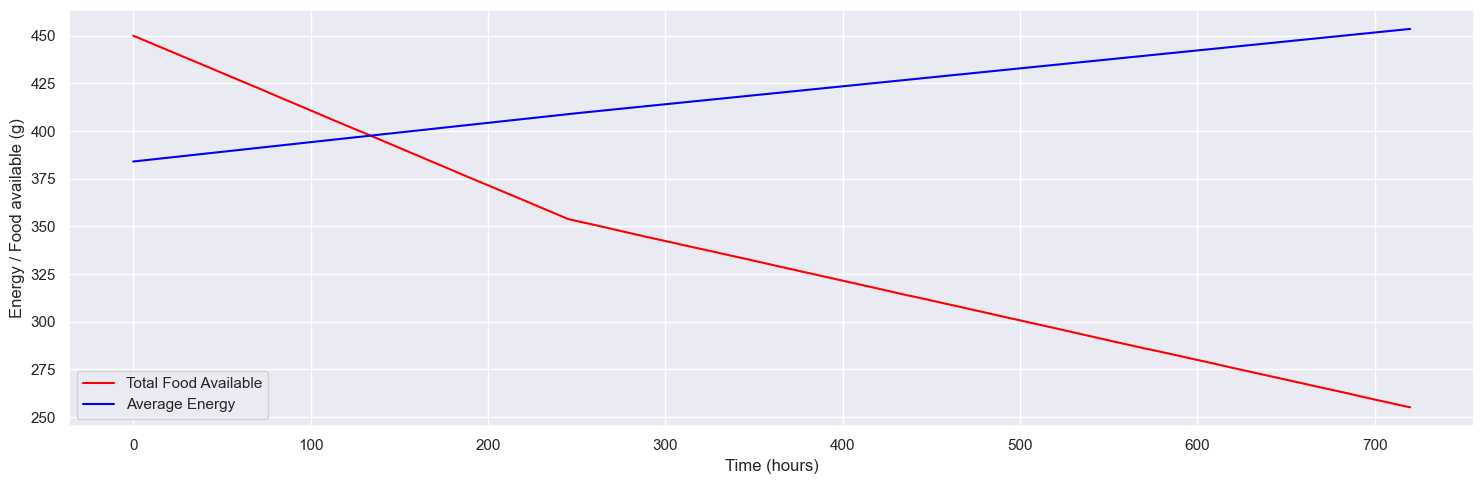

In [14]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot()
sns.lineplot(data=truncated_df_3, x='Step', y='TotalFoodAvailable', color='red', ax=ax, label='Total Food Available')
sns.lineplot(data=truncated_df_3, x='Step', y='AvgEnergy', color='blue', ax=ax, label='Average Energy')
plt.xlabel('Time (hours)')
plt.ylabel('Energy / Food available (g)')
plt.tight_layout()
plt.legend()
 
plt.savefig('plots/exp3-Environment-3.pdf')

In [15]:
min_energy_3 = truncated_df_3['AvgEnergy'].min()
max_energy_3 = truncated_df_3['AvgEnergy'].max()
print(f'Min energy: {min_energy_3}')
print(f'Max energy: {max_energy_3}')
coeff_3 = (max_energy_3 - min_energy_3) / 30
print(f'Coefficient: {coeff_3}')

Min energy: 384.0028
Max energy: 453.5499
Coefficient: 2.3182366666666665


In [16]:
expected_coeff = 2.058329999999999
print(f'Expected coefficient: {expected_coeff}')
print(f'Coefficient difference: {new_feedingrate - (coeff_3 - expected_coeff) * new_feedingrate}')

Expected coefficient: 2.058329999999999
Coefficient difference: 2.7756807914385555e-05
